In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop(['User ID','Gender'], axis=1, inplace=True)

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X=df.drop('Purchased', axis=1)

In [6]:
y=df.Purchased

In [7]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [16]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [17]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [18]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [19]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [20]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [21]:
np.round(X_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


# lets plot the Age and EstimatedSalary before and after scaling through scatter plot 

Text(0.5, 1.0, 'After scaling')

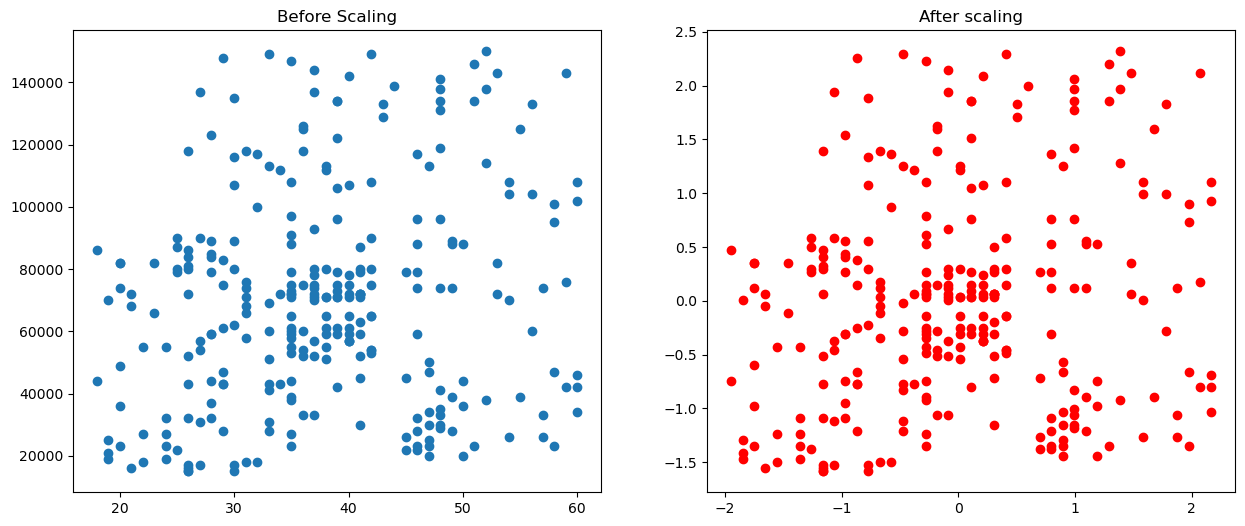

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(15,6))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After scaling')

Text(0.5, 1.0, 'After Scaling')

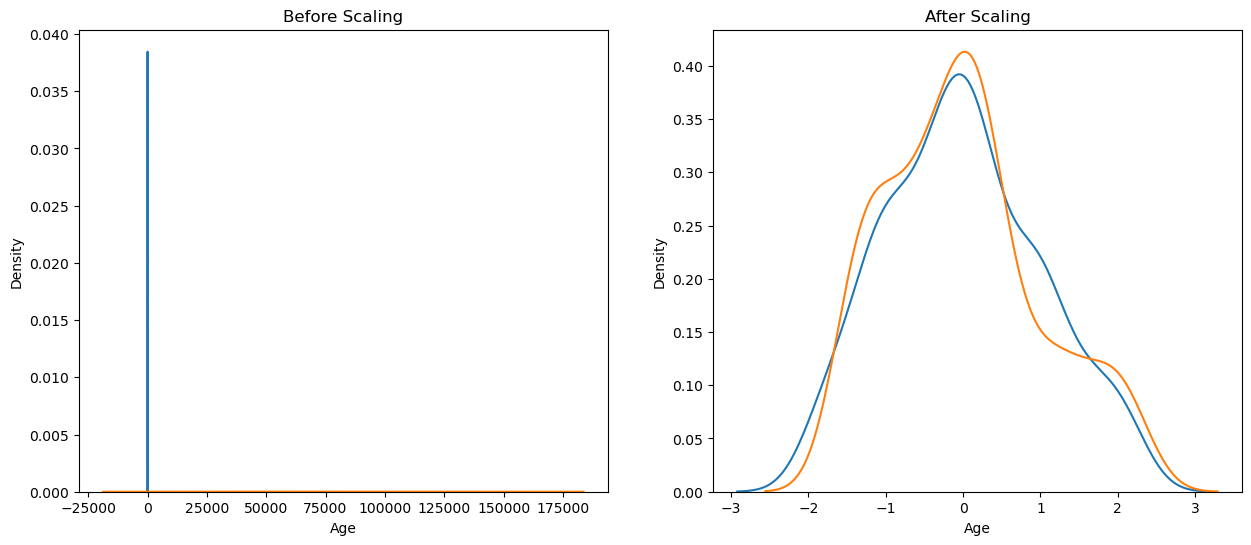

In [23]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(15,6))

sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

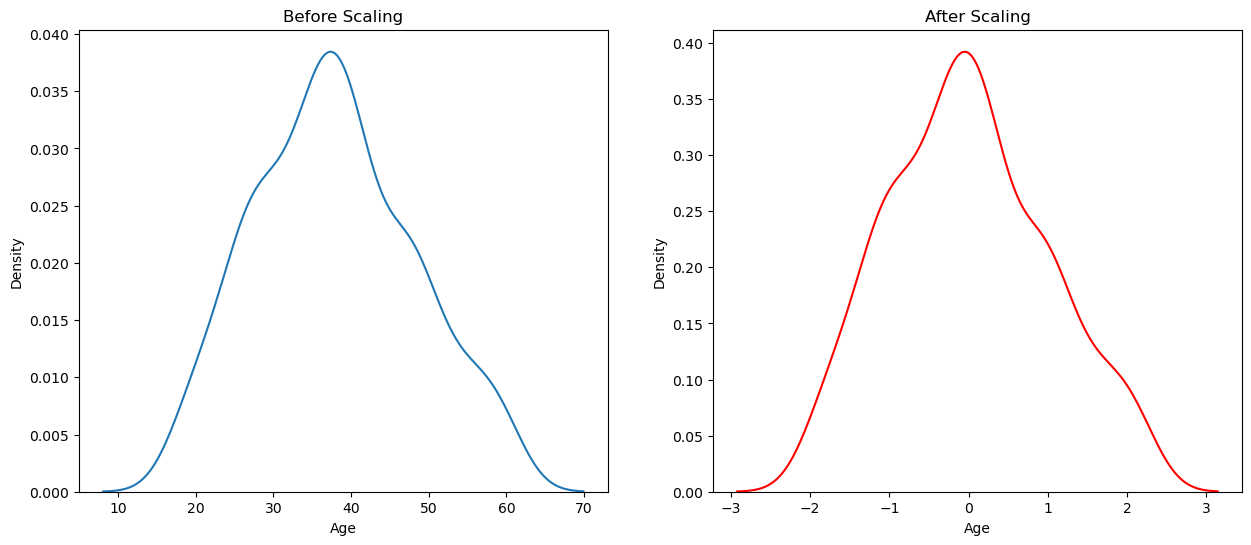

In [24]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(15,6))

sns.kdeplot(X_train['Age'], ax=ax1)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_scaled['Age'],color='red',ax=ax2)
ax2.set_title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

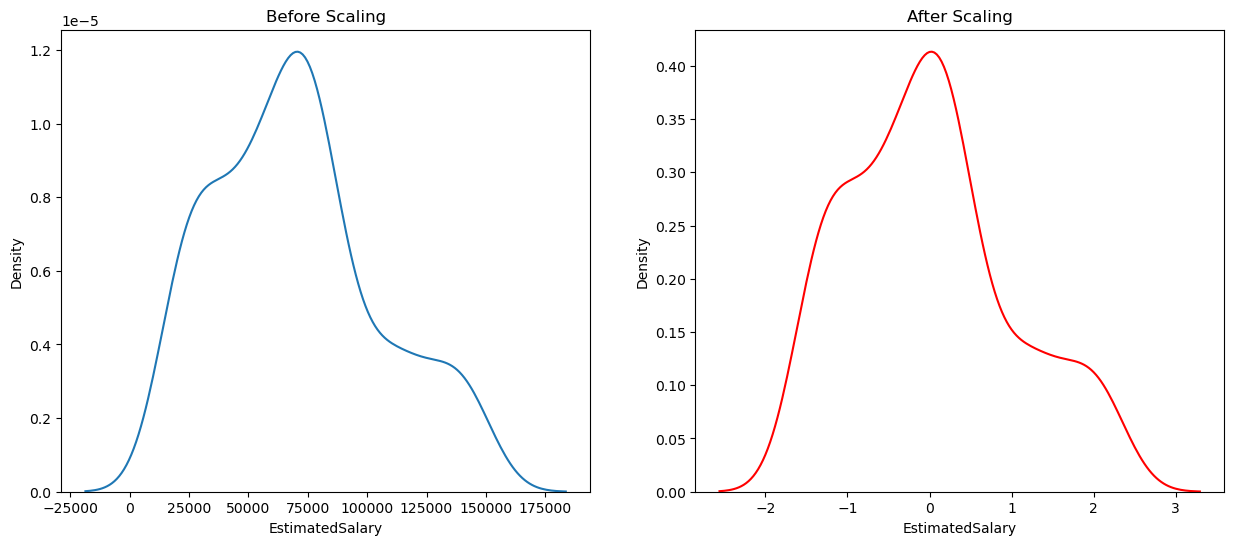

In [25]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(15,6))

sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],color='red', ax=ax2 )
ax2.set_title('After Scaling')

# Logistics Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model=LogisticRegression()
model_scalar=LogisticRegression()

In [28]:
model.fit(X_train,y_train)
model_scalar.fit(X_train_scaled,y_train)

LogisticRegression()

In [29]:
model.predict(X_test)
model_scalar.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, model.predict(X_test))

0.6583333333333333

In [32]:
accuracy_score(y_test, model_scalar.predict(X_test_scaled))


0.8666666666666667

# Decision Tree algorithm

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree=DecisionTreeClassifier()
tree_scaled=DecisionTreeClassifier()

In [35]:
tree.fit(X_train,y_train)
tree_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [36]:
tree.predict(X_test)
tree_scaled.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,tree.predict(X_test))

0.875

In [39]:
accuracy_score(y_test,tree_scaled.predict(X_test_scaled))

0.8666666666666667

In [40]:
from sklearn.metrics import confusion_matrix


In [41]:
confusion_matrix(y_test, tree.predict(X_test))

array([[70,  9],
       [ 6, 35]], dtype=int64)

In [42]:
confusion_matrix(y_test, tree_scaled.predict(X_test_scaled))

array([[70,  9],
       [ 7, 34]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        79
           1       0.80      0.85      0.82        41

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.86       120
weighted avg       0.88      0.88      0.88       120



In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, tree_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        79
           1       0.79      0.83      0.81        41

    accuracy                           0.87       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.87      0.87      0.87       120



# RandomForest algorithm

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
random=RandomForestClassifier()
random_scaled=RandomForestClassifier()

In [49]:
random.fit(X_train,y_train)
random_scaled.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [50]:
random.predict(X_test)
random_scaled.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test, random.predict(X_test))

0.9166666666666666

In [53]:
accuracy_score(y_test, random_scaled.predict(X_test_scaled))

0.9083333333333333

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test, random_scaled.predict(X_test_scaled))

array([[73,  6],
       [ 5, 36]], dtype=int64)

In [56]:
confusion_matrix(y_test, random.predict(X_test))

array([[74,  5],
       [ 5, 36]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        79
           1       0.88      0.88      0.88        41

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



In [59]:
print(classification_report(y_test, random_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        79
           1       0.86      0.88      0.87        41

    accuracy                           0.91       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



# K-Nearest algorithm

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
kn=KNeighborsClassifier()
kn_scaled=KNeighborsClassifier()

In [62]:
kn.fit(X_train,y_train)
kn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [63]:
kn.predict(X_test)
kn_scaled.predict(X_test_scaled)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test, kn.predict(X_test))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.825

In [66]:
accuracy_score(y_test, kn_scaled.predict(X_test_scaled))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9166666666666666

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, kn.predict(X_test))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[69, 10],
       [11, 30]], dtype=int64)

In [69]:
confusion_matrix(y_test, kn_scaled.predict(X_test_scaled))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[73,  6],
       [ 4, 37]], dtype=int64)

# Support vector machine(SVM) algorithm

In [70]:
from sklearn.svm import SVC

In [71]:
svm=SVC()
svm_scaled=SVC()

In [72]:
svm.fit(X_train,y_train)
svm_scaled.fit(X_train_scaled,y_train)

SVC()

In [73]:
svm.predict(X_test)
svm_scaled.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test, svm.predict(X_test))

0.7916666666666666

In [76]:
accuracy_score(y_test, svm_scaled.predict(X_test_scaled))

0.9083333333333333

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test, svm.predict(X_test))

array([[77,  2],
       [23, 18]], dtype=int64)

In [79]:
confusion_matrix(y_test, svm_scaled.predict(X_test_scaled))

array([[72,  7],
       [ 4, 37]], dtype=int64)

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        79
           1       0.90      0.44      0.59        41

    accuracy                           0.79       120
   macro avg       0.83      0.71      0.73       120
weighted avg       0.81      0.79      0.77       120



In [82]:
print(classification_report(y_test, svm_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



# Naive_ bayes algorithm

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
naive=GaussianNB()
naive_scaled=GaussianNB()

In [85]:
naive.fit(X_train,y_train)
naive_scaled.fit(X_train_scaled,y_train)

GaussianNB()

In [86]:
naive.predict(X_test)
naive_scaled.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_test, naive.predict(X_test))

0.8916666666666667

In [89]:
accuracy_score(y_test, naive_scaled.predict(X_test_scaled))

0.8916666666666667

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test, naive.predict(X_test))

array([[74,  5],
       [ 8, 33]], dtype=int64)

In [92]:
confusion_matrix(y_test, naive_scaled.predict(X_test_scaled))

array([[74,  5],
       [ 8, 33]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test, naive.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



In [95]:
print(classification_report(y_test, naive_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120

